<a href="https://colab.research.google.com/github/brugalbryan/Artificial-Intelligence/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part I: General Knowledge

An example of a regression task and an example of a classification task.

linear regression is a predictive modeling technique. It is used in estimating exactly how much of y will change, when x changes a certain amount. a flower’s sepal length is mapped onto the x-axis and the petal length is mapped on the y-axis. Let us try and understand how the petal length changes with respect to the sepal length with the help of linear regression.

Classification task
An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories.




What is the purpose of a test dataset and how should one use it?

Data set plays a critical role in determining how well your model is performing.
typically we build a model with say 70% of your input data, leaving 30% aside for testing. we then check the accuracy of that model by seeing how well it does against the 30% training set.



## Part II: Regression

In this part, we will analyze a dataset about used car prices.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the data
cars = pd.read_csv('https://query.data.world/s/eqxrmzlhl3gouxeafp4ayp4sjw32lg',
                      encoding="ISO-8859-1")
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Extract the records whose name is "BMW_318i" and year of registration is after 1990. Name the subset `cars_BMW318i`.

In [ ]:
filter2 = (cars["name"] == "BMW_318i") & (cars["yearOfRegistration"] >= 1990)
cars_BMW318i = cars[filter2]
cars_BMW318i



,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
456,2016-04-04 10:57:55,BMW_318i,privat,Angebot,2350,control,limousine,2003,manuell,143,3er,150000,4,benzin,bmw,nein,2016-04-04 00:00:00,0,65558,2016-04-05 12:14:20
1497,2016-03-05 20:53:22,BMW_318i,privat,Angebot,2500,control,limousine,1999,manuell,118,3er,150000,9,benzin,bmw,nein,2016-03-05 00:00:00,0,23558,2016-03-15 07:15:17
1714,2016-03-21 13:36:24,BMW_318i,privat,Angebot,2600,test,cabrio,1996,manuell,116,3er,150000,4,benzin,bmw,nein,2016-03-21 00:00:00,0,27356,2016-03-21 13:36:24
3700,2016-03-29 19:55:05,BMW_318i,privat,Angebot,4100,control,limousine,2002,manuell,143,3er,150000,6,benzin,bmw,nein,2016-03-29 00:00:00,0,90443,2016-04-06 06:15:51
4318,2016-03-31 14:48:07,BMW_318i,privat,Angebot,2000,control,limousine,2000,manuell,118,3er,150000,5,benzin,bmw,nein,2016-03-31 00:00:00,0,58840,2016-04-06 07:45:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367122,2016-03-12 13:58:00,BMW_318i,privat,Angebot,2899,control,cabrio,1998,manuell,116,3er,150000,7,benzin,bmw,nein,2016-03-12 00:00:00,0,93195,2016-04-06 23:17:31
367483,2016-03-26 17:56:43,BMW_318i,privat,Angebot,6700,control,limousine,2007,manuell,129,3er,150000,9,benzin,bmw,nein,2016-03-26 00:00:00,0,45884,2016-03-26 17:56:43
368410,2016-03-30 15:51:12,BMW_318i,privat,Angebot,899,test,limousine,1998,manuell,116,3er,150000,6,benzin,bmw,ja,2016-03-30 00:00:00,0,73430,2016-04-03 05:47:04
369587,2016-03-23 10:37:36,BMW_318i,privat,Angebot,3199,control,limousine,2003,manuell,143,3er,150000,3,benzin,bmw,nein,2016-03-23 00:00:00,0,34121,2016-03-26 03:46:28


How many records are extracted?

In [ ]:
records= len(cars_BMW318i)
print("Records extracted:", records)


Records extracted: 615


Draw a scatter plot to show the relationship between the price and the year of registration.

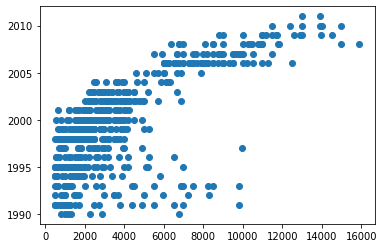

In [ ]:
plt.scatter(cars_BMW318i['price'], cars_BMW318i['yearOfRegistration'])


Build a simple linear model that predicts the price using the year of registration.

In [ ]:
# Train a linear regression model using sklearn
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(cars_BMW318i[['yearOfRegistration']], cars_BMW318i[['price']])
# test_data["prediction"] = model_lr.predict(cars_BMW318i[["price"]])




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Show the slope and the y-intercept of the regression line.

In [ ]:
# m = model_lr.coef_[0, 0]   # slope
# b = model_lr.intercept_[0] # y-intercept
# print(m)
# print(b)

print(model_lr.coef_)
print(model_lr.intercept_)


[[449.59849265]]
[-895204.04233745]


## Part III: Classification

In [ ]:
# Load the data
titanic_url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
titanic = pd.read_csv(titanic_url).drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1).dropna()
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In the "Sex" column, convert male to 1 and female to 0.

In [ ]:
def scolumn(value):
  return int(value== 'male')

titanic['Sex'] = titanic['Sex'].apply(scolumn)

titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


Split the dataset into `titanic_train` and `titanic_test`. The training set should contain 80% of all data.

In [ ]:
from sklearn.model_selection import train_test_split 
training_data, test_data = train_test_split(titanic, test_size=0.2)
test_data.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
13,0,3,1,39.0,1,5,31.2750
353,0,3,1,25.0,1,0,17.8000
25,1,3,0,38.0,1,5,31.3875
11,1,1,0,58.0,0,0,26.5500
204,1,3,1,18.0,0,0,8.0500
